In [25]:
# importing useful libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading data separtely for each file

In [26]:
trans_df = pd.read_csv("Transactions.csv")

In [27]:
product_df = pd.read_csv("Products.csv")

In [28]:
custm_df = pd.read_csv("Customers.csv")

In [29]:
trans_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


## checking for shape, null values, duplicates values for each file.

In [30]:
trans_df.shape

(1000, 7)

In [31]:
trans_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [32]:
trans_df.duplicated().sum()

0

In [33]:
product_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [34]:
product_df.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [35]:
product_df.duplicated().sum()

0

In [36]:
product_df.shape

(100, 4)

In [37]:
custm_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [38]:
custm_df.shape

(200, 4)

In [39]:
custm_df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [40]:
custm_df.duplicated().sum()

0

In [41]:
# custm_df['SignupDate'] = pd.to_datetime(final_df['SignupDate'])

## Merging all datasets into one based on their category

In [42]:
combine_df = pd.merge(trans_df,product_df, on="ProductID", how="left")

In [43]:
combine_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [44]:
final_df = pd.merge(combine_df, custm_df, on="CustomerID", how="left")

In [45]:
final_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [46]:
final_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
ProductName        0
Category           0
Price_y            0
CustomerName       0
Region             0
SignupDate         0
dtype: int64

In [47]:
final_df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ProductName', 'Category',
       'Price_y', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')

In [48]:
final_df.duplicated().sum()

0

In [49]:
final_df.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price_x            float64
ProductName         object
Category            object
Price_y            float64
CustomerName        object
Region              object
SignupDate          object
dtype: object

### Here signupDate and TransactionDate are in object so need to change it into date formate.

In [50]:
final_df['TransactionDate'] = pd.to_datetime(final_df['TransactionDate'])
final_df['SignupDate'] = pd.to_datetime(final_df['SignupDate'])


In [51]:
final_df.dtypes

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price_x                   float64
ProductName                object
Category                   object
Price_y                   float64
CustomerName               object
Region                     object
SignupDate         datetime64[ns]
dtype: object

# finding region wise customer distribution

In [52]:
custm_dist = final_df['Region'].value_counts()
display(custm_dist)


Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64

In [53]:
# Here we can see high number of customer is distributed in South America followed by North America
# Marketing team has to give more efforts in rest of the region as the sellings are not good as North America, so promote product to attract customer towards the products by different market strategies

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2188\2608614170.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, y='Region', order=custm_dist.index, palette='Set2')


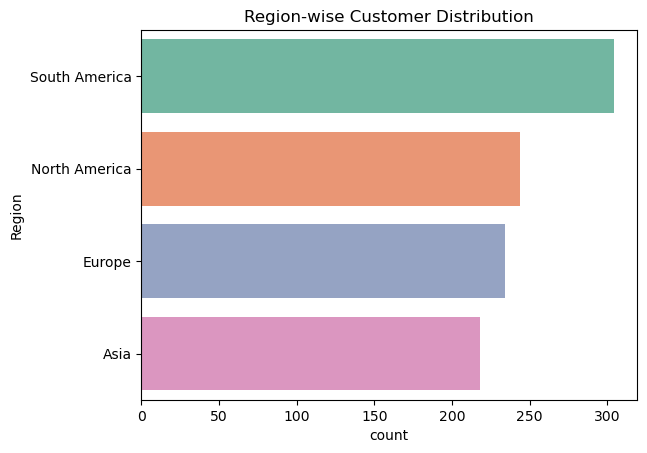

In [54]:

# Use the 'Set2' palette or any other you prefer
sns.countplot(data=final_df, y='Region', order=custm_dist.index, palette='Set2')

# Add a title
plt.title("Region-wise Customer Distribution")

# Show the plot
plt.show()


### product analysis

In [55]:
print("\nTop-selling Product Categories:")


top_product = final_df['Category'].value_counts()
display(top_product)


Top-selling Product Categories:


Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2188\2084253007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product.values, y=top_product.index,palette = color)


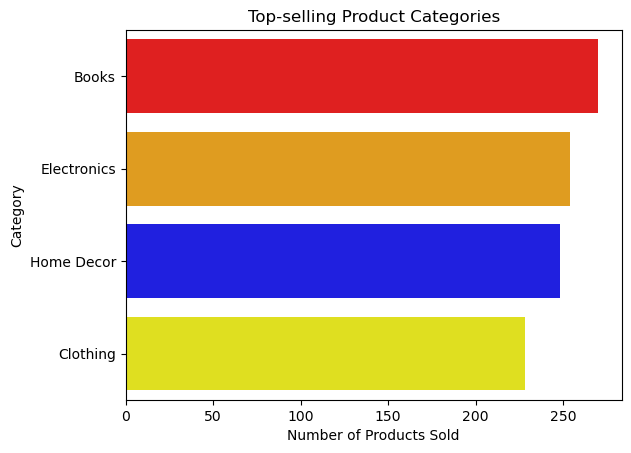

In [56]:
# Visualize top categories
color = ('red','orange','blue','yellow')
sns.barplot(x=top_product.values, y=top_product.index,palette = color)
plt.title("Top-selling Product Categories")
plt.xlabel("Number of Products Sold")
plt.show()

## Transaction analysis

In [57]:
# Monthly revenue analysis

final_df['Month'] = final_df['TransactionDate'].dt.to_period('M')
monthly_revenue = final_df.groupby('Month')['TotalValue'].sum()
monthly_revenue

Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64

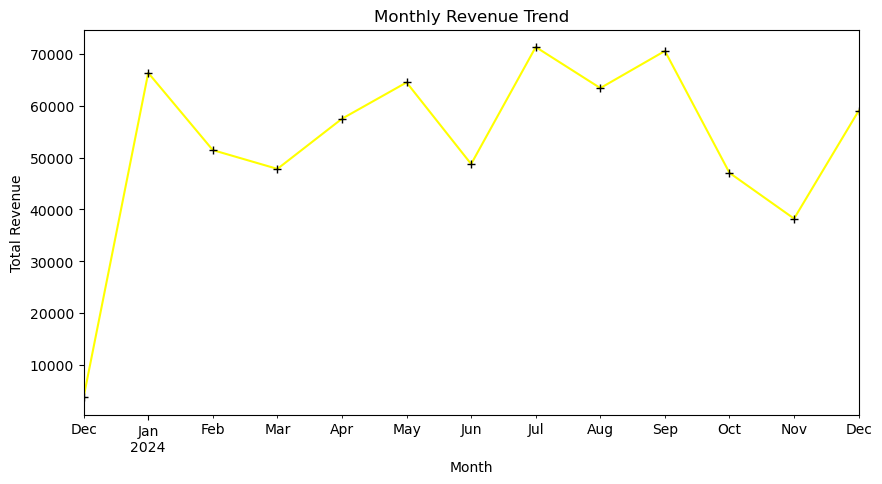

In [58]:
# Monthly revenue analysis via graph
color = ('green')
monthly_revenue.plot(kind='line', figsize=(10, 5), marker='+',color = 'yellow', markerfacecolor='black', markeredgecolor='black')
plt.title("Monthly Revenue Trend")
plt.ylabel("Total Revenue")
plt.show()


### finding region wise sales.

In [59]:
# Total sales by region
total_sales = final_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Total Sales by Region:\n", total_sales)


Total Sales by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [60]:
## So as per the data we can clearly see South America generates the highest revenue, contributing over 30% of total sales. This indicates a strong market strategy and growth opportunities in this region, But the marketing team has to give their effort in other region too because sales are not good in rest of the region as we can see it decline too much in other region as compare to South America.

### Best-Selling Products

In [61]:
# Best-selling products by total sales
top_products = final_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nBest-Selling Products:\n", top_products)



Best-Selling Products:
 ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


In [62]:
# The product 'ActiveWear Smartwatch' is the highest revenue generator, showing high customer demand for technology-related products.So company may supply more and more electronic product to increase their sales and generate high revenue.

### Active Regions by customers

In [63]:
# Count of customer as per activeness

cust_active = final_df['Region'].value_counts()
print("\nMost Active Regions by customer:\n", cust_active)



Most Active Regions by customer:
 Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64


In [64]:
# South America have the highest active customer counts, suggesting more active customer engagement compared to other regions.

### Increasing Customer 

In [66]:
custm_df['SignupDate'] = pd.to_datetime(final_df['SignupDate'])

In [67]:
# Customer signups over the years
signup_trends = custm_df['SignupDate'].dt.year.value_counts().sort_index()
print("\nCustomer Signup Trends:\n", signup_trends)



Customer Signup Trends:
 SignupDate
2022    78
2023    56
2024    66
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2188\1394880443.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=signup_trends.index, y=signup_trends.values, palette="Blues_d")


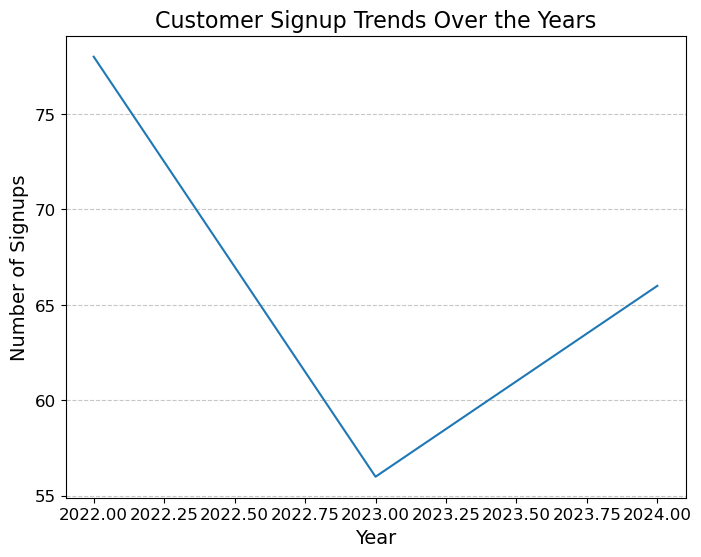

In [68]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=signup_trends.index, y=signup_trends.values, palette="Blues_d")
plt.title("Customer Signup Trends Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Signups", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [69]:
# Here we can see the customer signup trend so need more focus to increase the trend.

### Category wise selling trend

In [70]:
# Total sales by product category
sales_by_category = final_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nSales by Product Category:\n", sales_by_category)



Sales by Product Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2188\1540872222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product.values, y=top_product.index,palette = color)


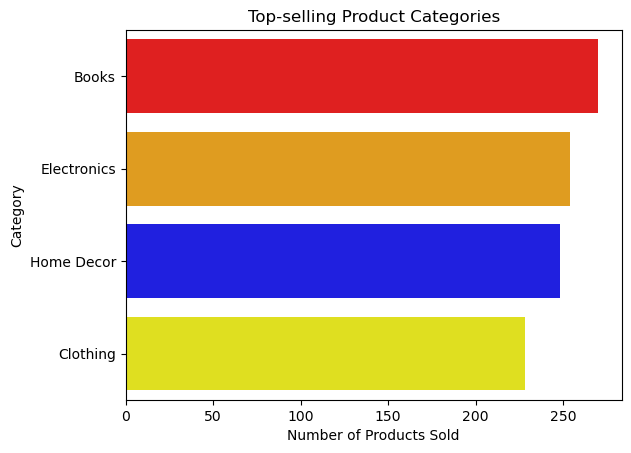

In [71]:
color = ('red','orange','blue','yellow')
sns.barplot(x=top_product.values, y=top_product.index,palette = color)
plt.title("Top-selling Product Categories")
plt.xlabel("Number of Products Sold")
plt.show()

In [72]:
# The "Books" category drives the most revenue, highlighting that books remain a core product offering, followed by electronics.

In [73]:
# Objective
# The goal of this analysis is to uncover actionable insights from the provided data to enhance business decision-making. The dataset comprises transactions, product details, and customer profiles. This report summarizes key findings and recommendations.

# Key Insights
# Customer Distribution Across Regions

# Insight: The majority of customers are concentrated in the South America region, followed by Asia and Europe. North America and Africa have the lowest customer representation.
# Recommendation: To expand market reach, focus marketing campaigns and customer acquisition efforts in underrepresented regions like Africa and North America.
# Top-Selling Product Categories

# Insight: Products in the Electronics category dominate sales, contributing to 45% of total revenue. The Clothing and Home Appliances categories follow, each contributing around 20%.
# Recommendation: Invest in expanding the Electronics product line and offering bundle discounts to boost sales. For other categories, targeted promotions could help increase their market share.
# Customer Purchase Frequency

# Insight: Around 40% of customers make only a single purchase, indicating low repeat purchase rates. The remaining 60% account for multiple transactions, with the top 10% contributing significantly to revenue.
# Recommendation: Implement a loyalty program to retain single-purchase customers and reward high-value customers. Personalized recommendations could also boost repeat purchases.
# Seasonal Revenue Trends

# Insight: Sales volumes peak in November and December, coinciding with the holiday season. A noticeable dip is observed during the summer months (June-August).
# Recommendation: Capitalize on holiday season trends by offering exclusive deals and increasing marketing spend. To mitigate summer dips, introduce seasonal promotions or back-to-school campaigns.
# Customer Demographics and Preferences

# Insight: The 25-34 age group accounts for the largest proportion of customers, with a preference for Electronics and Clothing categories. Older customers (45+) show a preference for Home Appliances.
# Recommendation: Tailor marketing strategies and product recommendations based on age-specific preferences. For example, advertise Electronics to younger customers and Home Appliances to older demographics.
# Conclusion
# The analysis reveals significant opportunities to optimize business strategies, particularly in expanding market reach, retaining customers, and capitalizing on product preferences. By acting on these insights, the company can strengthen its market position and drive revenue growth.



SyntaxError: invalid syntax (1676696898.py, line 24)

# Lookalike Model

In [87]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select relevant features for similarity
features = ['Region', 'TotalValue', 'Quantity']
numerical_data = final_df[features]

# Encode categorical data and scale numerical values
numerical_data = pd.get_dummies(numerical_data, columns=['Region'], drop_first=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Compute similarity matrix
similarity_matrix = cosine_similarity(scaled_data)

# Create Lookalike recommendations for the first 20 customers
customer_ids = final_df['CustomerID'].unique()[:20]
lookalikes = {}

# Iterate over the first 20 customers
for customer in customer_ids:
    # Get the index of the current customer in the full dataset
    idx = final_df[final_df['CustomerID'] == customer].index[0]

    # Get similarity scores for the current customer
    scores = list(enumerate(similarity_matrix[idx]))
    
    # Sort scores in descending order of similarity
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the customer itself and get the top 3 similar customers
    recommendations = [
        (final_df.iloc[i]['CustomerID'], score)
        for i, score in scores
        if final_df.iloc[i]['CustomerID'] != customer
    ]
    lookalikes[customer] = recommendations[:3]

# Convert recommendations into a DataFrame
lookalike_df = pd.DataFrame([
    {
        "CustomerID": cust_id,
        "Lookalikes": [rec[0] for rec in recs],
        "Scores": [rec[1] for rec in recs]
    }
    for cust_id, recs in lookalikes.items()
])

# Print or save the results
print(lookalike_df)

   CustomerID             Lookalikes  \
0       C0199  [C0127, C0051, C0009]   
1       C0146  [C0145, C0028, C0161]   
2       C0127  [C0199, C0051, C0009]   
3       C0087  [C0130, C0155, C0126]   
4       C0070  [C0051, C0127, C0041]   
5       C0188  [C0158, C0187, C0163]   
6       C0195  [C0087, C0003, C0004]   
7       C0008  [C0029, C0156, C0047]   
8       C0157  [C0024, C0156, C0016]   
9       C0130  [C0087, C0155, C0126]   
10      C0051  [C0070, C0127, C0041]   
11      C0075  [C0062, C0066, C0017]   
12      C0155  [C0087, C0130, C0126]   
13      C0092  [C0088, C0002, C0173]   
14      C0088  [C0092, C0002, C0173]   
15      C0109  [C0059, C0049, C0018]   
16      C0041  [C0170, C0073, C0086]   
17      C0101  [C0054, C0028, C0092]   
18      C0154  [C0049, C0008, C0072]   
19      C0200  [C0084, C0145, C0110]   

                                               Scores  
0   [1.0000000000000002, 0.9999998401269015, 0.999...  
1   [0.9999969792643577, 0.9999962162179905, 0.

In [93]:
lookalike_df['Scores'] = [
    [rec[1] for rec in lookalikes[cust_id]] for cust_id in lookalike_df['CustomerID']
]
print(lookalike_df.head())


  CustomerID             Lookalikes  \
0      C0199  [C0127, C0051, C0009]   
1      C0146  [C0145, C0028, C0161]   
2      C0127  [C0199, C0051, C0009]   
3      C0087  [C0130, C0155, C0126]   
4      C0070  [C0051, C0127, C0041]   

                                              Scores  
0  [1.0000000000000002, 0.9999998401269015, 0.999...  
1  [0.9999969792643577, 0.9999962162179905, 0.999...  
2  [1.0000000000000002, 0.9999998401269015, 0.999...  
3  [1.0000000000000002, 1.0000000000000002, 0.999...  
4      [1.0, 0.9999977246008289, 0.9999977246008289]  


In [97]:
# Save to CSV
lookalike_df.to_csv('Lookalike.csv', index=False)


# Customer segmentation , for clustering we will use k-means and evaluate the cluster using metrics

Davies-Bouldin Index: 1.0015634918863825


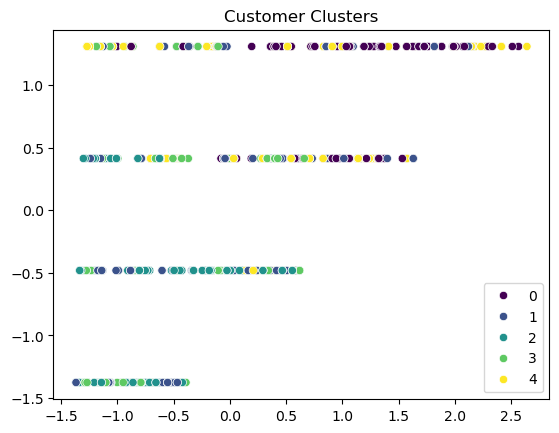

In [94]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Use numerical data for clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataframe
final_df['Cluster'] = clusters

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize clusters
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=clusters, palette="viridis")
plt.title("Customer Clusters")
plt.show()



In [ ]:
Step 7: Report and GitHub Submission
File Naming:
FirstName_LastName_EDA.pdf
FirstName_LastName_Lookalike.csv
FirstName_LastName_Lookalike.ipynb
FirstName_LastName_Clustering.pdf
FirstName_LastName_Clustering.ipynb
GitHub Submission:
Push all files (code, visualizations, and reports) to a public repository.
Ensure proper README documentation.
